In [2]:
import pandas as pd

df = pd.read_csv('Clientes_atualizado.csv', sep=';')
df.head(3)

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,time_zone,company_name,department,job_title,language,university,linkedin_skill,Salary_Year,Age,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-174738864,242955141,...,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,181956,33,12960144253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-48383044,-806482153,...,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,121041,48,10026741
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-64240524,-79242648,...,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,190616,24,4816119747


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   first_name      50999 non-null  object
 1   last_name       50999 non-null  object
 2   title           50999 non-null  object
 3   gender          50999 non-null  object
 4   email           50999 non-null  object
 5   city            50999 non-null  object
 6   country         50999 non-null  object
 7   country_code    50965 non-null  object
 8   latitude        50999 non-null  int64 
 9   longitude       50999 non-null  int64 
 10  phone           50999 non-null  object
 11  street_address  50999 non-null  object
 12  street_name     50999 non-null  object
 13  street_number   50999 non-null  int64 
 14  street_suffix   50999 non-null  object
 15  time_zone       50999 non-null  object
 16  company_name    50999 non-null  object
 17  department      50999 non-null  object
 18  job_ti

In [4]:
# Verificar se existem linhas duplicadas
duplicados = df[df.duplicated()]
duplicados

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,time_zone,company_name,department,job_title,language,university,linkedin_skill,Salary_Year,Age,ip_address


In [5]:
# Remover linhas com valores nulos
df_tratado = df.dropna()
print("Total de linhas após remoção de registros nulos:", len(df_tratado))

Total de linhas após remoção de registros nulos: 50965


In [6]:
# Concatenação das tabelas para obter os dados em uma só estrutura
# Unir colunas nome e sobrenome
df_tratado['name']=df['first_name'].str.cat(df['last_name'],sep=" ")

# Renomear colunas
df_tratado.rename(columns={'company_name': 'company', 'job_title': 'job','linkedin_skill':'skill'})

# Remoção de colunas desnecessárias
colunas_para_remover = ['latitude', 'longitude', 'time_zone', 'ip_address', 'language', 'street_name', 'street_address', 'street_number', 'street_suffix', 'linkedin_skill', 'country_code']
df_tratado.drop(columns=colunas_para_remover, inplace=True)

# Exibição do Dataframe após tratamento da base
df_tratado

<ipython-input-6-1db082a3bae6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['name']=df['first_name'].str.cat(df['last_name'],sep=" ")
<ipython-input-6-1db082a3bae6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado.drop(columns=colunas_para_remover, inplace=True)


,first_name,last_name,title,gender,email,city,country,phone,company_name,department,job_title,university,Salary_Year,Age,name
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,222-398-8279,Omba,Support,Internal Auditor,University of Zambia,181956,33,Priscella Pollett
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,650-786-5808,Cogidoo,Sales,Compensation Analyst,Universidad Nacional de San Antonio Abad,121041,48,Ana Onge
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,325-412-0143,Edgewire,Support,Health Coach II,Universidad Nacional de San Martín,190616,24,Butch Rawls
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,664-380-9221,Digitube,Support,General Manager,Fuzhou University,114326,65,Ambros Fairrie
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,477-429-2626,Quaxo,Engineering,Internal Auditor,Mahachulalongkorn Buddhist University,238481,57,Gaylene Titcomb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50994,Madeleine,Beales,Mrs,Female,mbealesrn@dagondesign.com,Point Hill,Jamaica,259-755-6269,Flashpoint,Marketing,Pharmacist,"University of the West Indies, Mona",71659,48,Madeleine Beales
50995,Tiena,Linfoot,Mrs,Female,tlinfootro@reddit.com,Jiesheng,China,319-442-0470,Skajo,Services,Graphic Designer,Hubei University,206310,61,Tiena Linfoot
50996,Warren,Skeggs,Mr,Male,wskeggsrp@who.int,El Copey,Colombia,745-639-8096,Mybuzz,Accounting,VP Sales,Conservatorio del Tolima,152965,37,Warren Skeggs
50997,Collette,Aspy,Dr,Polygender,caspyrq@weather.com,Xiaping,China,177-615-0101,Eire,Legal,Assistant Media Planner,China Agriculture University East,237424,59,Collette Aspy


In [7]:
# Tabela de metadados
nomes_colunas = df_tratado.columns.tolist()
tipos_dados = df_tratado.dtypes.tolist()
exemplos = [df_tratado[coluna].iloc[0] for coluna in nomes_colunas]
percentuais_nulos = [df_tratado[coluna].isnull().mean() * 100 for coluna in nomes_colunas]

metadados = {
    'Nome da Coluna': nomes_colunas,
    'Tipo de Dados': tipos_dados,
    'Exemplo': exemplos,
    'Percentual de Nulos': percentuais_nulos
}

df_metadados = pd.DataFrame(metadados)
print(df_metadados)

   Nome da Coluna Tipo de Dados                Exemplo  Percentual de Nulos
0      first_name        object              Priscella                  0.0
1       last_name        object                Pollett                  0.0
2           title        object              Honorable                  0.0
3          gender        object                Agender                  0.0
4           email        object  ppollett0@foxnews.com                  0.0
5            city        object                Sesheke                  0.0
6         country        object                 Zambia                  0.0
7           phone        object           222-398-8279                  0.0
8    company_name        object                   Omba                  0.0
9      department        object                Support                  0.0
10      job_title        object       Internal Auditor                  0.0
11     university        object   University of Zambia                  0.0
12    Salary

In [8]:
# Análise univariada
# Estatísticas descritivas da coluna country
estatisticas = df_tratado['country'].describe()
print(estatisticas)

count     50965
unique      234
top       China
freq       9343
Name: country, dtype: object


In [9]:
# Contagem de elementos agrupados pela coluna gender
contagem = df_tratado.groupby('gender')['name'].count()
print("Contagem:", contagem)

Contagem: gender
Agender          839
Bigender         848
Female         22891
Genderfluid      863
Genderqueer      857
Male           22902
Non-binary       903
Polygender       862
Name: name, dtype: int64


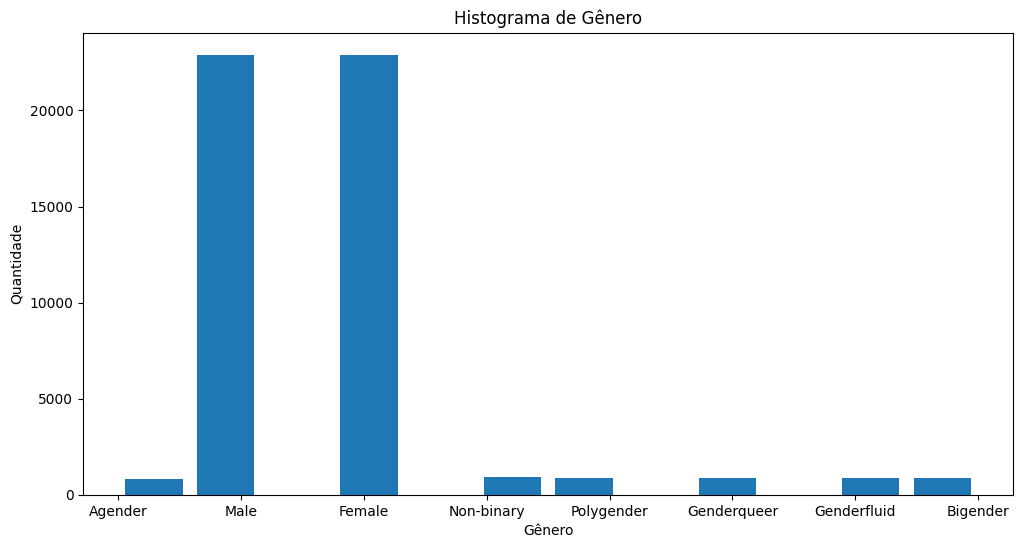

In [10]:
import matplotlib.pyplot as plt

# Histograma da coluna gender
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_tratado['gender'], bins=12, rwidth=0.8, align='mid')
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')
ax.set_title('Histograma de Gênero')
plt.show()

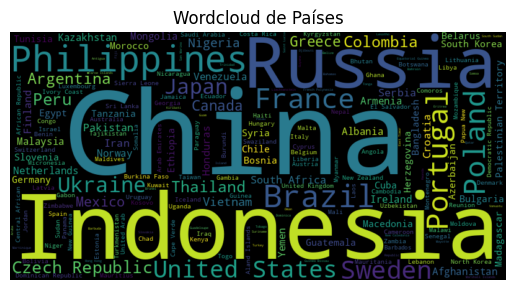

In [11]:
from wordcloud import WordCloud

# Wordcloud da coluna Paises
palavras = ' '.join(df_tratado['country'])
wordcloud = WordCloud(width=800, height=400).generate(palavras)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de Países')

plt.show()

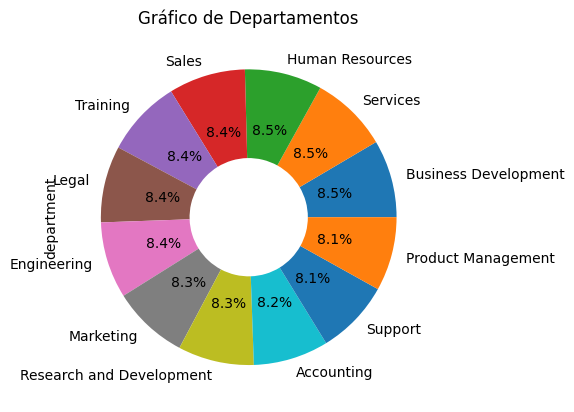

In [12]:
# Donut chart da coluna Departamentos
contagem = df_tratado['department'].value_counts()
contagem.plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(width=0.6))
plt.title('Gráfico de Departamentos')

plt.show()

In [13]:
#Análise bivariada - Gênero por departamento
genero_departamento = pd.crosstab(df_tratado['gender'], df_tratado['department'])
print(genero_departamento)

department   Accounting  Business Development  Engineering  Human Resources  \
gender                                                                        
Agender              80                    55           77               77   
Bigender             79                    81           68               84   
Female             1885                  1945         1873             1888   
Genderfluid          73                    78           68               84   
Genderqueer          63                    78           65               84   
Male               1862                  1939         1955             1933   
Non-binary           77                    88           81               79   
Polygender           69                    61           71               83   

department   Legal  Marketing  Product Management  Research and Development  \
gender                                                                        
Agender         65         79                  67  

<ipython-input-14-b1c5a4f3fa4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['Indice'] = range(len(df_tratado))


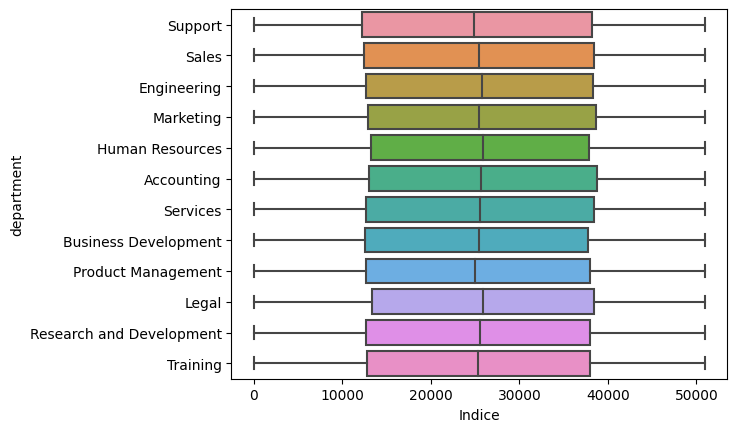

In [14]:
#Análise bivariada

import seaborn as sns
df_tratado['Indice'] = range(len(df_tratado))
contagem = df_tratado['Indice'].value_counts()
# Plotar um box plot das duas variáveis
sns.boxplot(x=df_tratado['Indice'], y=df_tratado['department'])
plt.show()

In [15]:
#Análise bivariada - Distribuição de gênero por profissão

import plotly.express as px

profissoes = df_tratado[['job_title', 'gender']].groupby(['job_title', 'gender']).size().reset_index().sort_values(by=0, ascending=False).rename(columns={0: 'count'}).head(10)
px.bar(profissoes, x = 'job_title', y = 'count', title = 'Top 20 Profissões', color='gender', barmode='group')

In [17]:
#Análise bivariada - Distribuição de gênero por empresa

Empresas = df_tratado[['company_name', 'gender']].groupby(['company_name', 'gender']).size().reset_index().sort_values(by=0, ascending=False).rename(columns={0: 'count'}).head(20)
px.bar(Empresas, x = 'company_name', y = 'count', title = 'Top 20 Empresas', color='gender', barmode='group')

In [18]:
countries = df_tratado[['country']].groupby('country').size().reset_index().sort_values(by=0, ascending=False).rename(columns={0: 'count'})
px.bar(countries.head(20), x = 'country', y = 'count', title = 'Top 20 Countries')

In [19]:
# Distribuição de clientes pelo mundo

fig = px.choropleth(countries, locations='country', locationmode= 'country names', color='count', title='Contagem de clientes no Mundo')
fig.show()

In [34]:
# Modelo de previsão dos paises dos novos clientes com KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

X_treinamento = df_tratado[['Age', 'Salary_Year', 'gender']]
y_treinamento = df_tratado['country']

label_encoder = LabelEncoder()
X_treinamento['gender'] = label_encoder.fit_transform(X_treinamento['gender'])

# Otimização do hiperparâmetro K
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

modelo_knn = KNeighborsClassifier()

grid_search = GridSearchCV(modelo_knn, param_grid, cv=5) # GridSearchCV para encontrar o melhor valor de k
grid_search.fit(X_treinamento, y_treinamento)

melhor_k = grid_search.best_params_['n_neighbors']

# Treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_treinamento, y_treinamento, test_size=50000, random_state=42)

modelo_knn = KNeighborsClassifier(n_neighbors=melhor_k)
modelo_knn.fit(X_treinamento, y_treinamento)
##k = 10  # Número de vizinhos a serem considerados
##modelo_knn = KNeighborsClassifier(n_neighbors=k) MODELO ANTERIOR
##modelo_knn.fit(X_treino, y_treino)

precisao_teste = modelo_knn.score(X_teste, y_teste)
print(f'Precisão no conjunto de teste: {precisao_teste}')

# Previsões para novos clientes

novos_clientes = pd.DataFrame({
    'Age': [32, 27, 42, 20, 18, 76, 55, 55, 31, 19],
    'Salary_Year': [58000, 63000, 72000, 25405, 10000, 150000, 47600, 46675, 25000, 9000],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Bigender', 'Female', 'Male', 'Female', 'Agender', 'Polygender']
})

novos_clientes['gender'] = label_encoder.transform(novos_clientes['gender'])

previsoes_paises = modelo_knn.predict(novos_clientes)

novos_clientes['Pais_Previsto'] = previsoes_paises

print(novos_clientes)

<ipython-input-34-c9a056d530d2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Precisão no conjunto de teste: 0.23666
   Age  Salary_Year  gender   Pais_Previsto
0   32        58000       5  Czech Republic
1   27        63000       2           China
2   42        72000       2           China
3   20        25405       5       Indonesia
4   18        10000       1           China
5   76       150000       2       Indonesia
6   55        47600       5           China
7   55        46675       2          Russia
8   31        25000       0           China
9   19         9000       7           China
